<a href="https://colab.research.google.com/github/ctclumak/Tensorflow-2-and-Keras-Deep-Learning/blob/master/CNN_ON_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 41s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0].shape

(32, 32, 3)

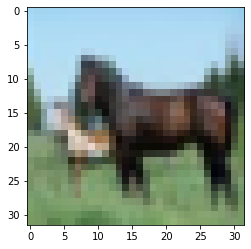

In [7]:
plt.imshow(X_train[12])

In [8]:
# Preprocessing
X_train[0].max()

255

In [0]:
X_train = X_train/255

In [0]:
X_test = X_test/255

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
# transform the y_train to categorical data
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train,10)

In [0]:
y_cat_test = to_categorical(y_test,10)

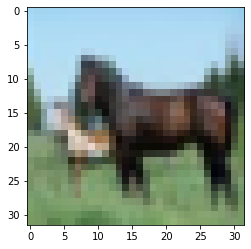

In [15]:
plt.imshow(X_train[12])

**Create the model**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten

In [18]:
model = Sequential()
# convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3), activation="relu",))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# add multiple laters

# convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3), activation="relu",))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#flatten the layer

model.add(Flatten())

# add dense layer
model.add(Dense(256, activation='relu'))
model.add(Dense(10,activation='softmax' ))

# compile the model
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [20]:
# add early stopping

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience = 2)

#fit the model
model.fit(X_train,y_cat_train, epochs=15,validation_data=(X_test,y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.5126 - acc: 0.4508 - val_loss: 1.2679 - val_acc: 0.5459
Epoch 2/15
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.1886 - acc: 0.5797 - val_loss: 1.1308 - val_acc: 0.5984
Epoch 3/15
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.0536 - acc: 0.6299 - val_loss: 1.1109 - val_acc: 0.6188
Epoch 4/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.9560 - acc: 0.6657 - val_loss: 1.0597 - val_acc: 0.6293
Epoch 5/15
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.8742 - acc: 0.6956 - val_loss: 1.0093 - val_acc: 0.6567
Epoch 6/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.8018 - acc: 0.7183 - val_loss: 0.9838 - val_acc: 0.6652
Epoch 7/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.7350 - acc: 0.7432 - val_loss: 1.

In [22]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,1.512581,0.45078,1.267945,0.5459
1,1.188600,0.57974,1.130840,0.5984
2,1.053556,0.62994,1.110898,0.6188
3,0.955952,0.66568,1.059735,0.6293
4,0.874179,0.69564,1.009291,0.6567
5,0.801836,0.71832,0.983830,0.6652
6,0.735023,0.74322,1.003375,0.6670
7,0.672569,0.76476,1.061327,0.6567


In [23]:
metrics.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

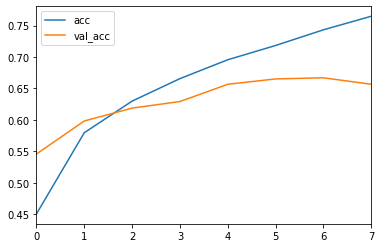

In [24]:
metrics[["acc", "val_acc"]].plot()

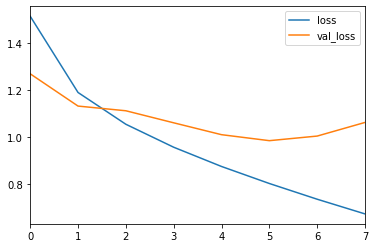

In [25]:
metrics[["loss", "val_loss"]].plot()

In [27]:
 #evaluate the model
 model.evaluate(X_test,y_cat_test,verbose=0)

[1.0613267609596253, 0.6567]

In [0]:
# create a classification report and evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1000
           1       0.72      0.82      0.77      1000
           2       0.62      0.47      0.53      1000
           3       0.48      0.49      0.49      1000
           4       0.56      0.68      0.61      1000
           5       0.67      0.46      0.54      1000
           6       0.66      0.79      0.72      1000
           7       0.82      0.67      0.74      1000
           8       0.82      0.68      0.74      1000
           9       0.61      0.79      0.69      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



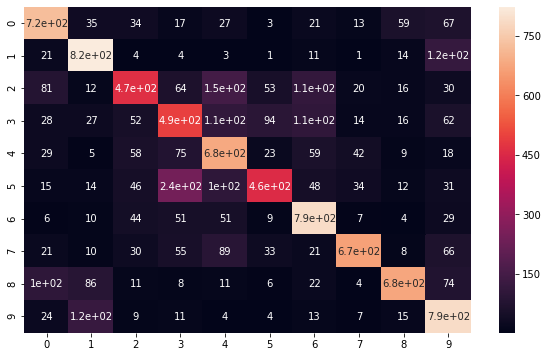

In [33]:
import seaborn as sns
plt.figure(figsize =(10,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot = True)

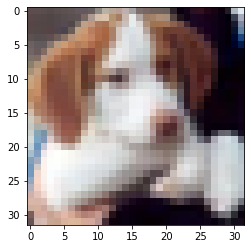

In [37]:
my_image = X_test[16]
plt.imshow(my_image)

In [38]:
y_test[16]

array([5], dtype=uint8)

In [39]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5])